## accident density
accident density map per year. overlayed with citibike stations.


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [3]:
#Einlesen der Unfall Daten von NYC
table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")

table_accidents

C:\Users\tzach\AppData\Local\Temp\ipykernel_6452\1767602452.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  table_accidents = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes_20250319.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2162654,03/15/2025,0:00,MANHATTAN,10011.0,40.737858,-73.996704,"(40.737858, -73.996704)",NaN,NaN,541 AVENUE OF THE AMERICAS,...,Unspecified,NaN,NaN,NaN,4799150,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2162655,03/15/2025,14:08,NaN,NaN,40.623123,-74.167595,"(40.623123, -74.167595)",LISK AVE,SOUTH AVE,NaN,...,Unspecified,NaN,NaN,NaN,4799203,Taxi,Pick-up Truck,NaN,NaN,NaN
2162656,03/15/2025,10:09,NaN,NaN,40.787760,-73.791370,"(40.78776, -73.79137)",CROSS ISLAND PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4798984,Sedan,NaN,NaN,NaN,NaN
2162657,03/15/2025,17:30,QUEENS,11373.0,40.746740,-73.883640,"(40.74674, -73.88364)",NaN,NaN,40-31 82 ST,...,Unspecified,NaN,NaN,NaN,4799434,Sedan,Sedan,NaN,NaN,NaN


In [107]:
year = 2022

table_accidents["CRASH DATE"]= pd.to_datetime(table_accidents["CRASH DATE"])
table_accidents_year = table_accidents[table_accidents["CRASH DATE"].dt.year == year]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
3,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
42,2022-09-22,16:16,QUEENS,11418.0,40.698257,-73.82632,"(40.698257, -73.82632)",123 STREET,89 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4566408,Sedan,E-Scooter,NaN,NaN,NaN
44,2022-06-29,16:00,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE OUTER ROADWA,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4542336,Motorscooter,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321194,2022-04-20,22:25,BROOKLYN,11208.0,40.682365,-73.88433,"(40.682365, -73.88433)",NaN,NaN,137 LINWOOD STREET,...,Unspecified,Unspecified,NaN,NaN,4718805,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
331985,2022-07-08,9:22,BROOKLYN,11225.0,40.671112,-73.96008,"(40.671112, -73.96008)",NaN,NaN,260 EASTERN PARKWAY,...,Unspecified,NaN,NaN,NaN,4739515,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2115418,2022-11-04,14:15,BRONX,10459,40.819690,-73.90161,"(40.81969, -73.90161)",PROSPECT AVENUE,WESTCHESTER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4580710,Sedan,Bus,NaN,NaN,NaN
2153430,2022-12-31,4:34,BRONX,10463.0,40.885098,-73.90066,"(40.885098, -73.90066)",BROADWAY,WEST 238 STREET,NaN,...,NaN,NaN,NaN,NaN,4596739,Pick-up Truck,NaN,NaN,NaN,NaN


In [108]:
# remove latitude zero rows and nan
table_accidents_year = table_accidents_year[table_accidents_year['LATITUDE'] > 0]
table_accidents_year

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
42,2022-09-22,16:16,QUEENS,11418.0,40.698257,-73.826320,"(40.698257, -73.82632)",123 STREET,89 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4566408,Sedan,E-Scooter,NaN,NaN,NaN
48,2022-07-12,17:50,BROOKLYN,11225.0,40.663303,-73.960490,"(40.663303, -73.96049)",NaN,NaN,44 EMPIRE BOULEVARD,...,Unspecified,NaN,NaN,NaN,4545699,Sedan,NaN,NaN,NaN,NaN
51,2022-04-24,16:45,NaN,NaN,40.607685,-74.138920,"(40.607685, -74.13892)",STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4521660,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
52,2022-04-24,4:49,NaN,NaN,40.855972,-73.869896,"(40.855972, -73.869896)",BOSTON ROAD,BRONX PARK EAST,NaN,...,Unspecified,NaN,NaN,NaN,4521759,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
53,2022-04-22,17:17,NaN,NaN,40.790276,-73.939600,"(40.790276, -73.9396)",EAST 107 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4522226,E-Bike,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321194,2022-04-20,22:25,BROOKLYN,11208.0,40.682365,-73.884330,"(40.682365, -73.88433)",NaN,NaN,137 LINWOOD STREET,...,Unspecified,Unspecified,NaN,NaN,4718805,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
331985,2022-07-08,9:22,BROOKLYN,11225.0,40.671112,-73.960080,"(40.671112, -73.96008)",NaN,NaN,260 EASTERN PARKWAY,...,Unspecified,NaN,NaN,NaN,4739515,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2115418,2022-11-04,14:15,BRONX,10459,40.819690,-73.901610,"(40.81969, -73.90161)",PROSPECT AVENUE,WESTCHESTER AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4580710,Sedan,Bus,NaN,NaN,NaN
2153430,2022-12-31,4:34,BRONX,10463.0,40.885098,-73.900660,"(40.885098, -73.90066)",BROADWAY,WEST 238 STREET,NaN,...,NaN,NaN,NaN,NaN,4596739,Pick-up Truck,NaN,NaN,NaN,NaN


In [109]:
def roundPartial (value, resolution):
    return round (value / resolution) * resolution

In [110]:
# define a grid by rounding and then count accidents in it...
table_accidents_year['LATITUDE ROUNDED'] = np.round(table_accidents_year.LATITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_year['LONGITUDE ROUNDED'] = np.round(table_accidents_year.LONGITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
table_accidents_year['LOCATION ROUNDED'] = table_accidents_year['LATITUDE ROUNDED'].astype(str) + ' ' + table_accidents_year['LONGITUDE ROUNDED'].astype(str) 
table_accidents_year

C:\Users\tzach\AppData\Local\Temp\ipykernel_6452\159586974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['LATITUDE ROUNDED'] = np.round(table_accidents_year.LATITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
C:\Users\tzach\AppData\Local\Temp\ipykernel_6452\159586974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_accidents_year['LONGITUDE ROUNDED'] = np.round(table_accidents_year.LONGITUDE.apply(lambda x: roundPartial(float(x), 0.005)), 3)
C:\Users\tzach\AppData

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LATITUDE ROUNDED,LONGITUDE ROUNDED,LOCATION ROUNDED
42,2022-09-22,16:16,QUEENS,11418.0,40.698257,-73.826320,"(40.698257, -73.82632)",123 STREET,89 AVENUE,NaN,...,NaN,4566408,Sedan,E-Scooter,NaN,NaN,NaN,40.700,-73.825,40.7 -73.825
48,2022-07-12,17:50,BROOKLYN,11225.0,40.663303,-73.960490,"(40.663303, -73.96049)",NaN,NaN,44 EMPIRE BOULEVARD,...,NaN,4545699,Sedan,NaN,NaN,NaN,NaN,40.665,-73.960,40.665 -73.96
51,2022-04-24,16:45,NaN,NaN,40.607685,-74.138920,"(40.607685, -74.13892)",STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,4521660,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,40.610,-74.140,40.61 -74.14
52,2022-04-24,4:49,NaN,NaN,40.855972,-73.869896,"(40.855972, -73.869896)",BOSTON ROAD,BRONX PARK EAST,NaN,...,NaN,4521759,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,40.855,-73.870,40.855 -73.87
53,2022-04-22,17:17,NaN,NaN,40.790276,-73.939600,"(40.790276, -73.9396)",EAST 107 STREET,NaN,NaN,...,NaN,4522226,E-Bike,NaN,NaN,NaN,NaN,40.790,-73.940,40.79 -73.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321194,2022-04-20,22:25,BROOKLYN,11208.0,40.682365,-73.884330,"(40.682365, -73.88433)",NaN,NaN,137 LINWOOD STREET,...,NaN,4718805,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,40.680,-73.885,40.68 -73.885
331985,2022-07-08,9:22,BROOKLYN,11225.0,40.671112,-73.960080,"(40.671112, -73.96008)",NaN,NaN,260 EASTERN PARKWAY,...,NaN,4739515,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,40.670,-73.960,40.67 -73.96
2115418,2022-11-04,14:15,BRONX,10459,40.819690,-73.901610,"(40.81969, -73.90161)",PROSPECT AVENUE,WESTCHESTER AVENUE,NaN,...,NaN,4580710,Sedan,Bus,NaN,NaN,NaN,40.820,-73.900,40.82 -73.9
2153430,2022-12-31,4:34,BRONX,10463.0,40.885098,-73.900660,"(40.885098, -73.90066)",BROADWAY,WEST 238 STREET,NaN,...,NaN,4596739,Pick-up Truck,NaN,NaN,NaN,NaN,40.885,-73.900,40.885 -73.9


In [111]:
rcParams['figure.figsize'] = 11.7,8.27

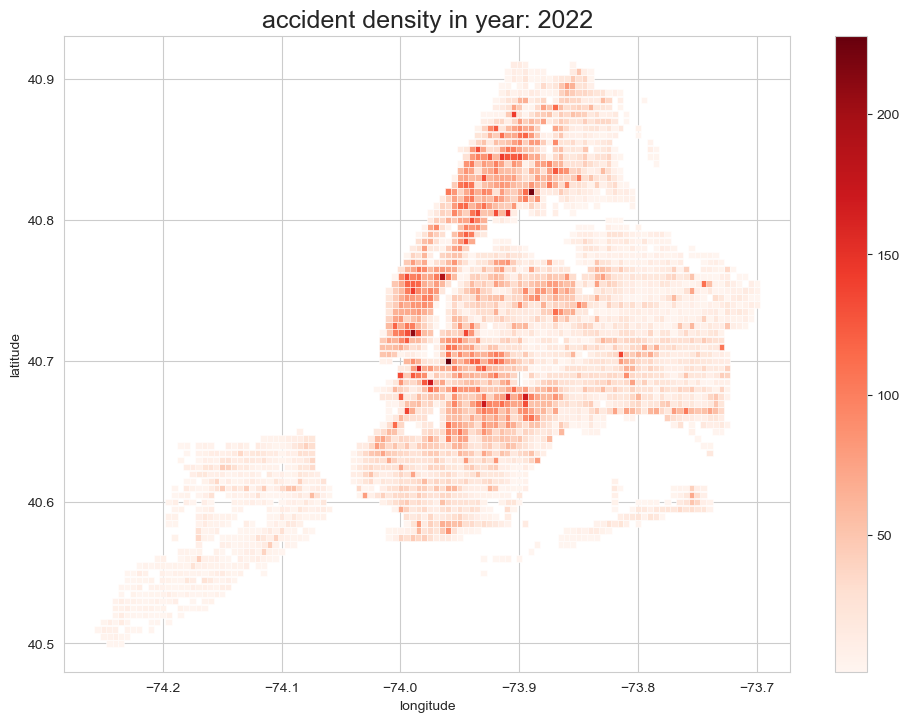

In [112]:
# all accidents
all_accidents = pd.DataFrame(table_accidents_year['LOCATION ROUNDED'].value_counts())
all_accidents['location'] = all_accidents.index
all_accidents[['latitude', 'longitude']] = all_accidents.location.str.split(' ', n= 1, expand=True)
all_accidents['latitude'] = all_accidents['latitude'].astype(float)
all_accidents['longitude'] = all_accidents['longitude'].astype(float)
all_accidents

#sns.kdeplot(data=all_accidents, x="longitude", y="latitude", cmap="Reds", fill=True, bw_adjust=0.6)
#sns.scatterplot(data=all_accidents, x="longitude", y="latitude", hue="count", s=3)
#sns.scatterplot(data=table_accidents_year, x="LONGITUDE", y="LATITUDE", s=2)

sns.set_style("whitegrid")
norm = plt.Normalize(all_accidents['count'].min(), all_accidents['count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

fig = sns.scatterplot(data=all_accidents, x="longitude", y="latitude", s=22, hue='count', marker='s', palette='Reds')
fig.set_title("accident density in year: " + str(year), size=18)

# Remove the legend and add a colorbar
fig.get_legend().remove()
fig.figure.colorbar(sm, ax=ax)

In [113]:
# only cyclists involved
